<a href="https://colab.research.google.com/github/yash11046/py/blob/master/Fraud_check(ANN-classifier).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np

In [2]:
fraud=pd.read_csv('Fraud_check.csv')

In [3]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
fraud.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [17]:
y1=np.empty(600, dtype=object)
i=0

for value in fraud['Taxable.Income']:
    if value<=30000:
        y1[i]='Risky'
    else:
        y1[i]='Good'
    i=i+1    

In [18]:
t1=pd.DataFrame(y1,columns=['target'])

In [19]:
y1

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky', 'Risky', 'Good',
       'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good'

In [20]:
t1

,target
0,Good
1,Good
2,Good
3,Good
4,Good
...,...
595,Good
596,Good
597,Good
598,Good


In [22]:
fraud=pd.concat([fraud,t1],axis=1)

In [23]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,target
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [29]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
SC=StandardScaler()
LB=LabelEncoder()

In [24]:
fraud['Undergrad']=LB.fit_transform(fraud['Undergrad'])
fraud['Marital.Status']=LB.fit_transform(fraud['Marital.Status'])
fraud['Work.Experience']=LB.fit_transform(fraud['Work.Experience'])
fraud['Urban']=LB.fit_transform(fraud['Urban'])
fraud['target']=LB.fit_transform(fraud['target'])

In [25]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,target
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,0
596,1,0,69967,55369,2,1,0
597,0,0,47334,154058,0,1,0
598,1,1,98592,180083,17,0,0


In [26]:
X=fraud.drop(['target'],axis=1)
y=fraud.target

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=60)

In [34]:
X_train.shape

(480, 6)

In [30]:
X_train=SC.fit_transform(X_train)
X_test=SC.transform(X_test)

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout
import tensorflow as tf

In [35]:
SQ=Sequential()

In [39]:
#input layer
SQ.add(Dense(units=480,activation='ReLU'))


In [41]:
#5 hidden layer
SQ.add(Dense(units=500,activation='ReLU'))
SQ.add(Dense(units=520,activation='ReLU'))
SQ.add(Dense(units=540,activation='ReLU'))
SQ.add(Dense(units=470,activation='ReLU'))
SQ.add(Dense(units=420,activation='ReLU'))
SQ.add(Dropout(0.3))

In [42]:
SQ.add(Dense(units=1,activation='sigmoid'))
# output layer

In [43]:
SQ.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [45]:
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=30,
    verbose=5,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [46]:
model_1=SQ.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
33/33 [==============================] - 3s 40ms/step - loss: 0.4205 - accuracy: 0.8069 - val_loss: 0.2594 - val_accuracy: 0.7925
Epoch 2/1000
33/33 [==============================] - 1s 31ms/step - loss: 0.3797 - accuracy: 0.8910 - val_loss: 0.1843 - val_accuracy: 0.8931
Epoch 3/1000
33/33 [==============================] - 1s 31ms/step - loss: 0.2197 - accuracy: 0.8879 - val_loss: 0.2905 - val_accuracy: 0.8931
Epoch 4/1000
33/33 [==============================] - 1s 31ms/step - loss: 0.1632 - accuracy: 0.9252 - val_loss: 0.1785 - val_accuracy: 0.9182
Epoch 5/1000
33/33 [==============================] - 1s 31ms/step - loss: 0.1386 - accuracy: 0.9626 - val_loss: 0.1671 - val_accuracy: 0.9057
Epoch 6/1000
33/33 [==============================] - 1s 32ms/step - loss: 0.1903 - accuracy: 0.9252 - val_loss: 0.2048 - val_accuracy: 0.9182
Epoch 7/1000
33/33 [==============================] - 1s 31ms/step - loss: 0.2191 - accuracy: 0.9252 - val_loss: 0.2779 - val_accuracy: 0.8868

In [47]:
model_1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [49]:
import numpy as np
import matplotlib.pyplot as plt

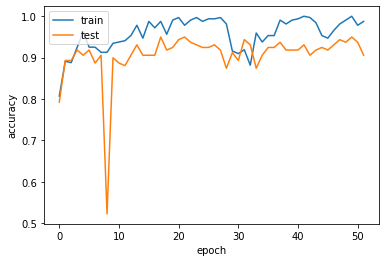

In [50]:
plt.plot(model_1.history['accuracy'])
plt.plot(model_1.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

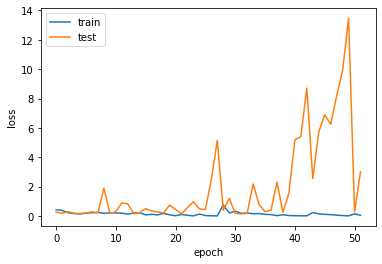

In [51]:
plt.plot(model_1.history['loss'])
plt.plot(model_1.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [52]:
pre=SQ.predict(X_test)
pre=(pre>=0.5)

4/4 [==============================] - 0s 20ms/step


In [54]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,pre)

In [55]:
cm

array([[88,  3],
       [ 3, 26]])

In [57]:
score=accuracy_score(y_test,pre)
score

0.95